In [1]:
import sys
#!{sys.executable} -m pip install seaborn==0.9.0
import seaborn
print(seaborn.__version__)
import random
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import matplotlib.pyplot as plt
import statistics
from scipy.stats import norm,geom,poisson,expon,binom
import numpy as np
import pandas as pd
import seaborn as sns
#sns.set(rc={"figure.figsize": (24, 12)})
plt.style.use({'figure.figsize':(6, 3)})
sns.set_style('dark')
sns.set_context("poster")
pd.set_option('display.float_format', lambda x: '%.2f' % x)
from warnings import filterwarnings
filterwarnings('ignore')

0.10.1


# 数据分布

In [2]:
#实验次数
n = 10000
#正面朝上概率
p = 0.5
#正面朝上的平均数
mean_t_times = 3

df_distribution = pd.DataFrame()
x = np.arange(0, n) 
#二值随机
df_distribution['Bernoulli'] = np.random.binomial(1,p,n) 
#n次抛硬币实验中有x次正面朝上的概率
df_distribution['Binom'] = binom.pmf(x, n, p)
#n次事件中，在第x次正面朝上的概率
df_distribution['Geometry'] = geom.pmf(x, p)
#正态分布
norm_array =np.random.normal(50,1,n)
norm_dataframe =pd.DataFrame(norm_array,columns=['test'])
df_distribution['Gaussian']=norm_dataframe['test']

Text(0, 0.5, 'Exponent')

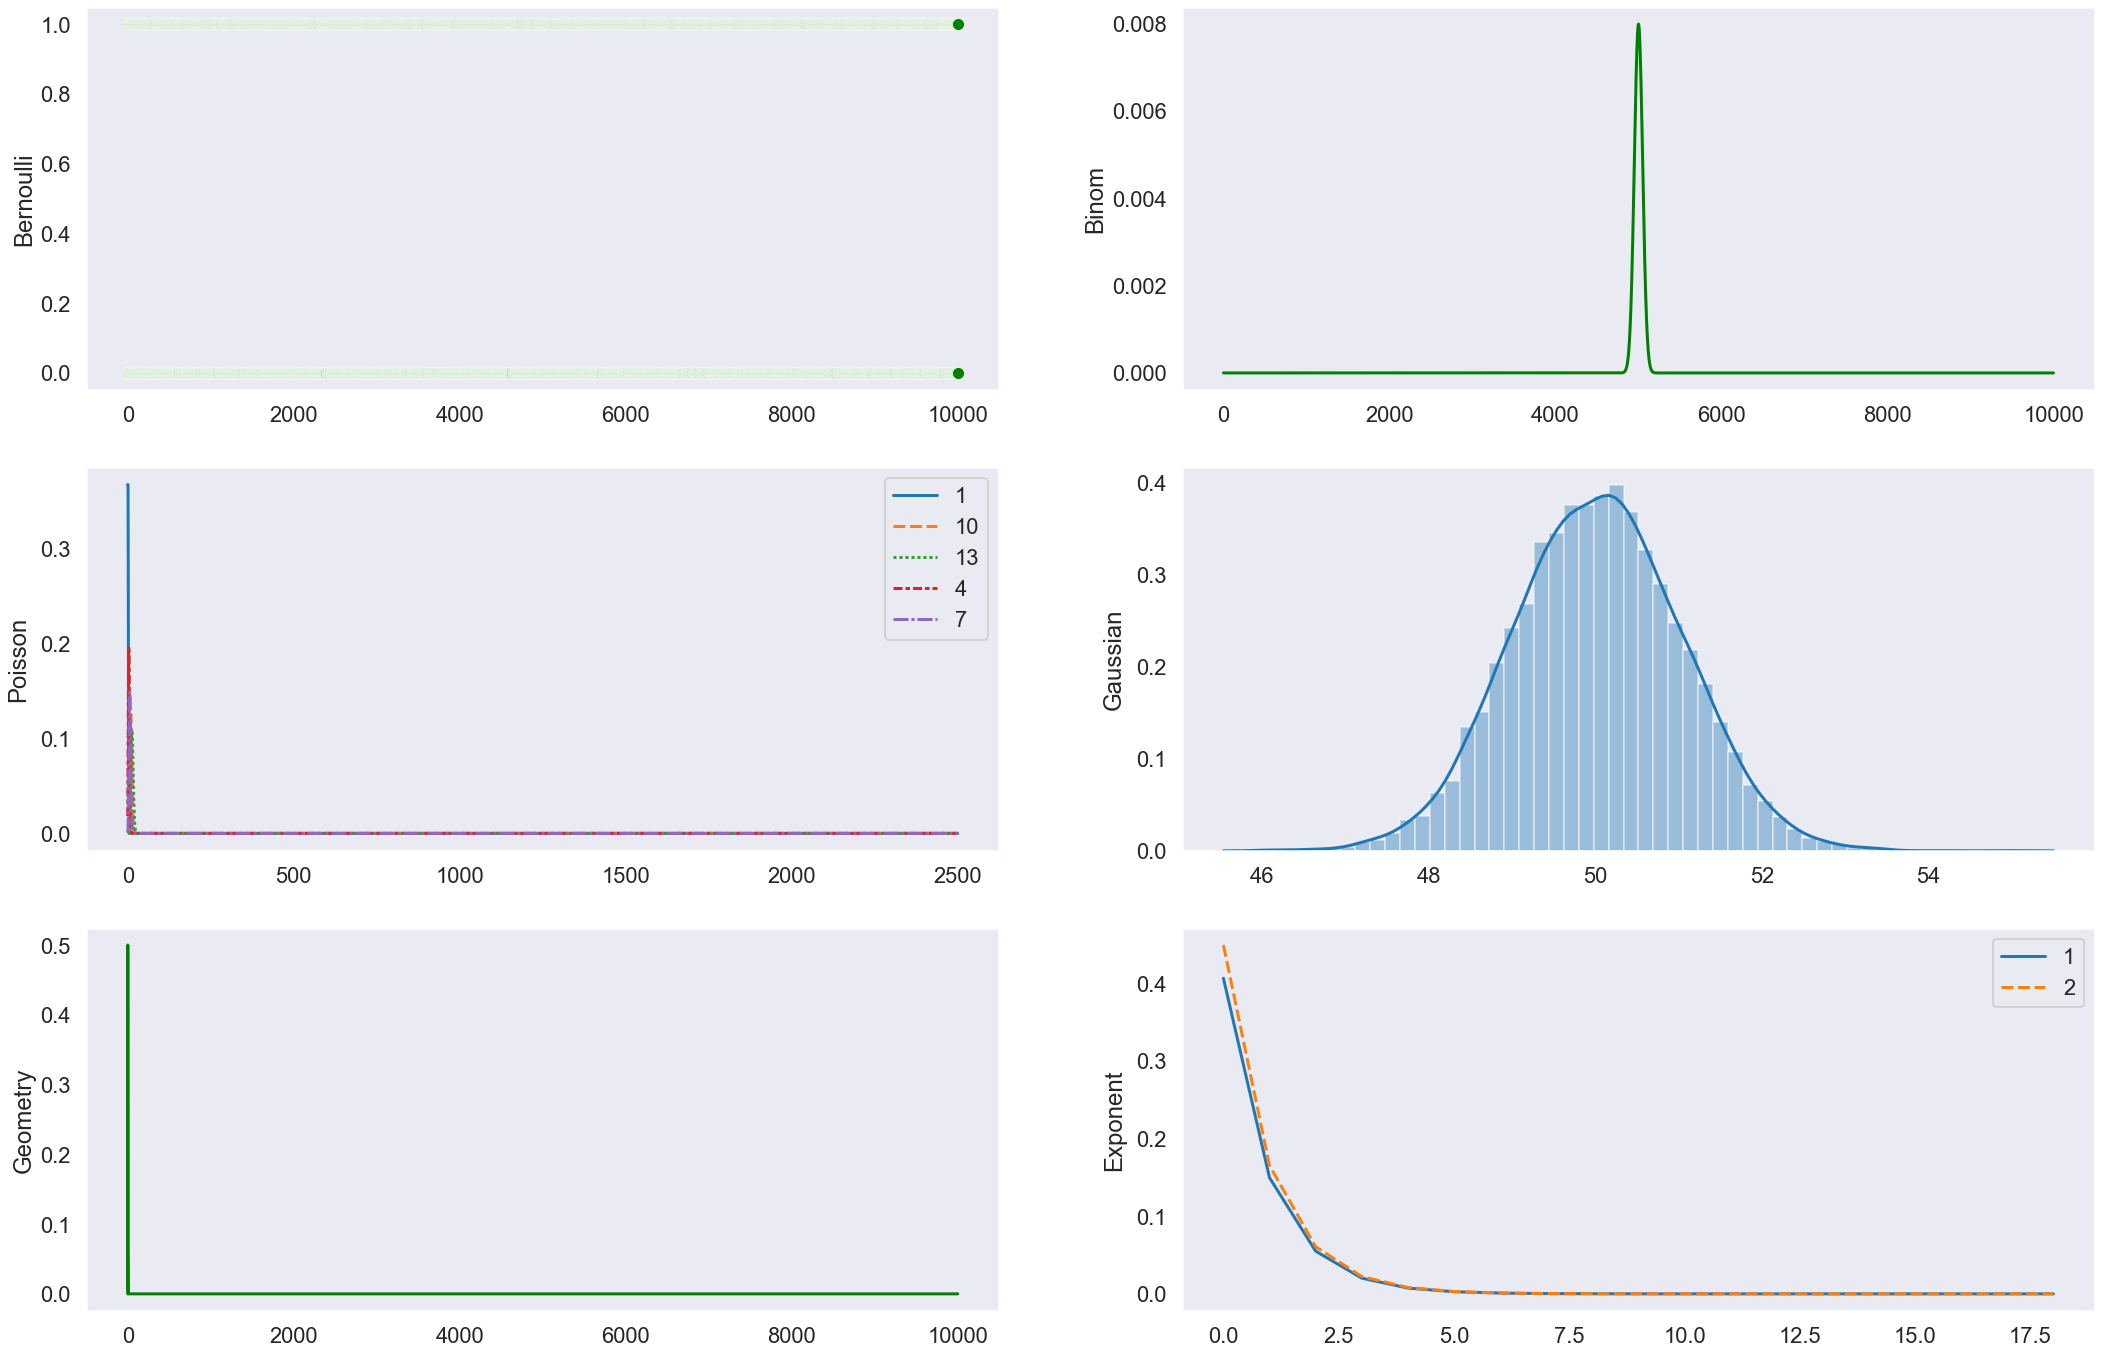

In [3]:
fig,axes=plt.subplots(3,2,figsize=(36,24)) 
sns.scatterplot(x=df_distribution.index, y='Bernoulli',color='g', data=df_distribution, ax=axes[0, 0])
sns.lineplot(x=df_distribution.index, y='Binom', color='g',data=df_distribution, ax=axes[0, 1])
#sns.lineplot(x=df_distribution.index, y='Poisson', color='g',data=df_distribution, ax=axes[1, 0])
#sns.lineplot(x=df_distribution.index, y='Gaussian', color='g',data=df_distribution, ax=axes[1, 1])
sns.lineplot(x=df_distribution.index, y='Geometry', color='g',data=df_distribution, ax=axes[2, 0])
sns.distplot(df_distribution['Gaussian'], ax=axes[1, 1]);

#泊松分布，单位时间，正面朝上发生的次数
df_poisson = pd.DataFrame()
x1 = np.arange(0, n/4) 
for i in range(1,15,3):
    x_poisson = poisson.pmf(x1, i)
    df_poisson[str(i)] = x_poisson
sns.lineplot(color='g',data=df_poisson, ax=axes[1, 0])
#指数分布
df_exponent = pd.DataFrame()
x1 = np.arange(1, 20) 
for i in range(1,3):
    lam = i/10
    df_exponent[str(i)] = expon.pdf(x1,lam)
sns.lineplot(color='g',data=df_exponent, ax=axes[2, 1])

axes[1, 0].set_ylabel("Poisson",labelpad=10)
axes[1, 1].set_ylabel("Gaussian",labelpad=10)
axes[1, 1].set_xlabel("",labelpad=10)
axes[2, 1].set_ylabel("Exponent",labelpad=10)

# 标准化&归一化

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('./US/datasets_555089_1255330_us_covid19_daily.csv')
df['date'] = df['date'].astype(str)
df.sort_values('date',ascending=True,inplace=True)
df0 = df[['states','positive','total']]
scaler = MinMaxScaler()  
scaler.fit(df0)
scaled_features = scaler.transform(df0)
df1 = pd.DataFrame(data=scaled_features, columns=["states", "positive","total"])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df0)
df2 = pd.DataFrame(data=scaled_features, columns=["states", "positive","total"])

df0['type'] = 'raw'
df0['v_states'] = df0['states'].var()
df0['v_positive'] = df0['positive'].var()
df0['v_total'] = df0['total'].var()
df1['type'] = 'minmax'
df1['v_states'] = df1['states'].var()
df1['v_positive'] = df1['positive'].var()
df1['v_total'] = df1['total'].var()
df2['type'] = 'z-score'
df2['v_states'] = df2['states'].var()
df2['v_positive'] = df2['positive'].var()
df2['v_total'] = df2['total'].var()
df_all = pd.concat([df0,df1,df2]).reset_index()
del df_all['index']
df_all = df_all.groupby(['type'])['states','v_states','positive','v_positive','total','v_total'].mean().sort_values('total',ascending=False)
df_all

,states,v_states,positive,v_positive,total,v_total
type,,,,,,
raw,39.35,609.96,664494.14,544984655925.58,5456999.31,51306809957603.92
minmax,0.70,0.20,0.31,0.12,0.22,0.09
z-score,0.00,1.01,-0.00,1.01,-0.00,1.01


Text(0.5, 1.0, 'v:1.0068')

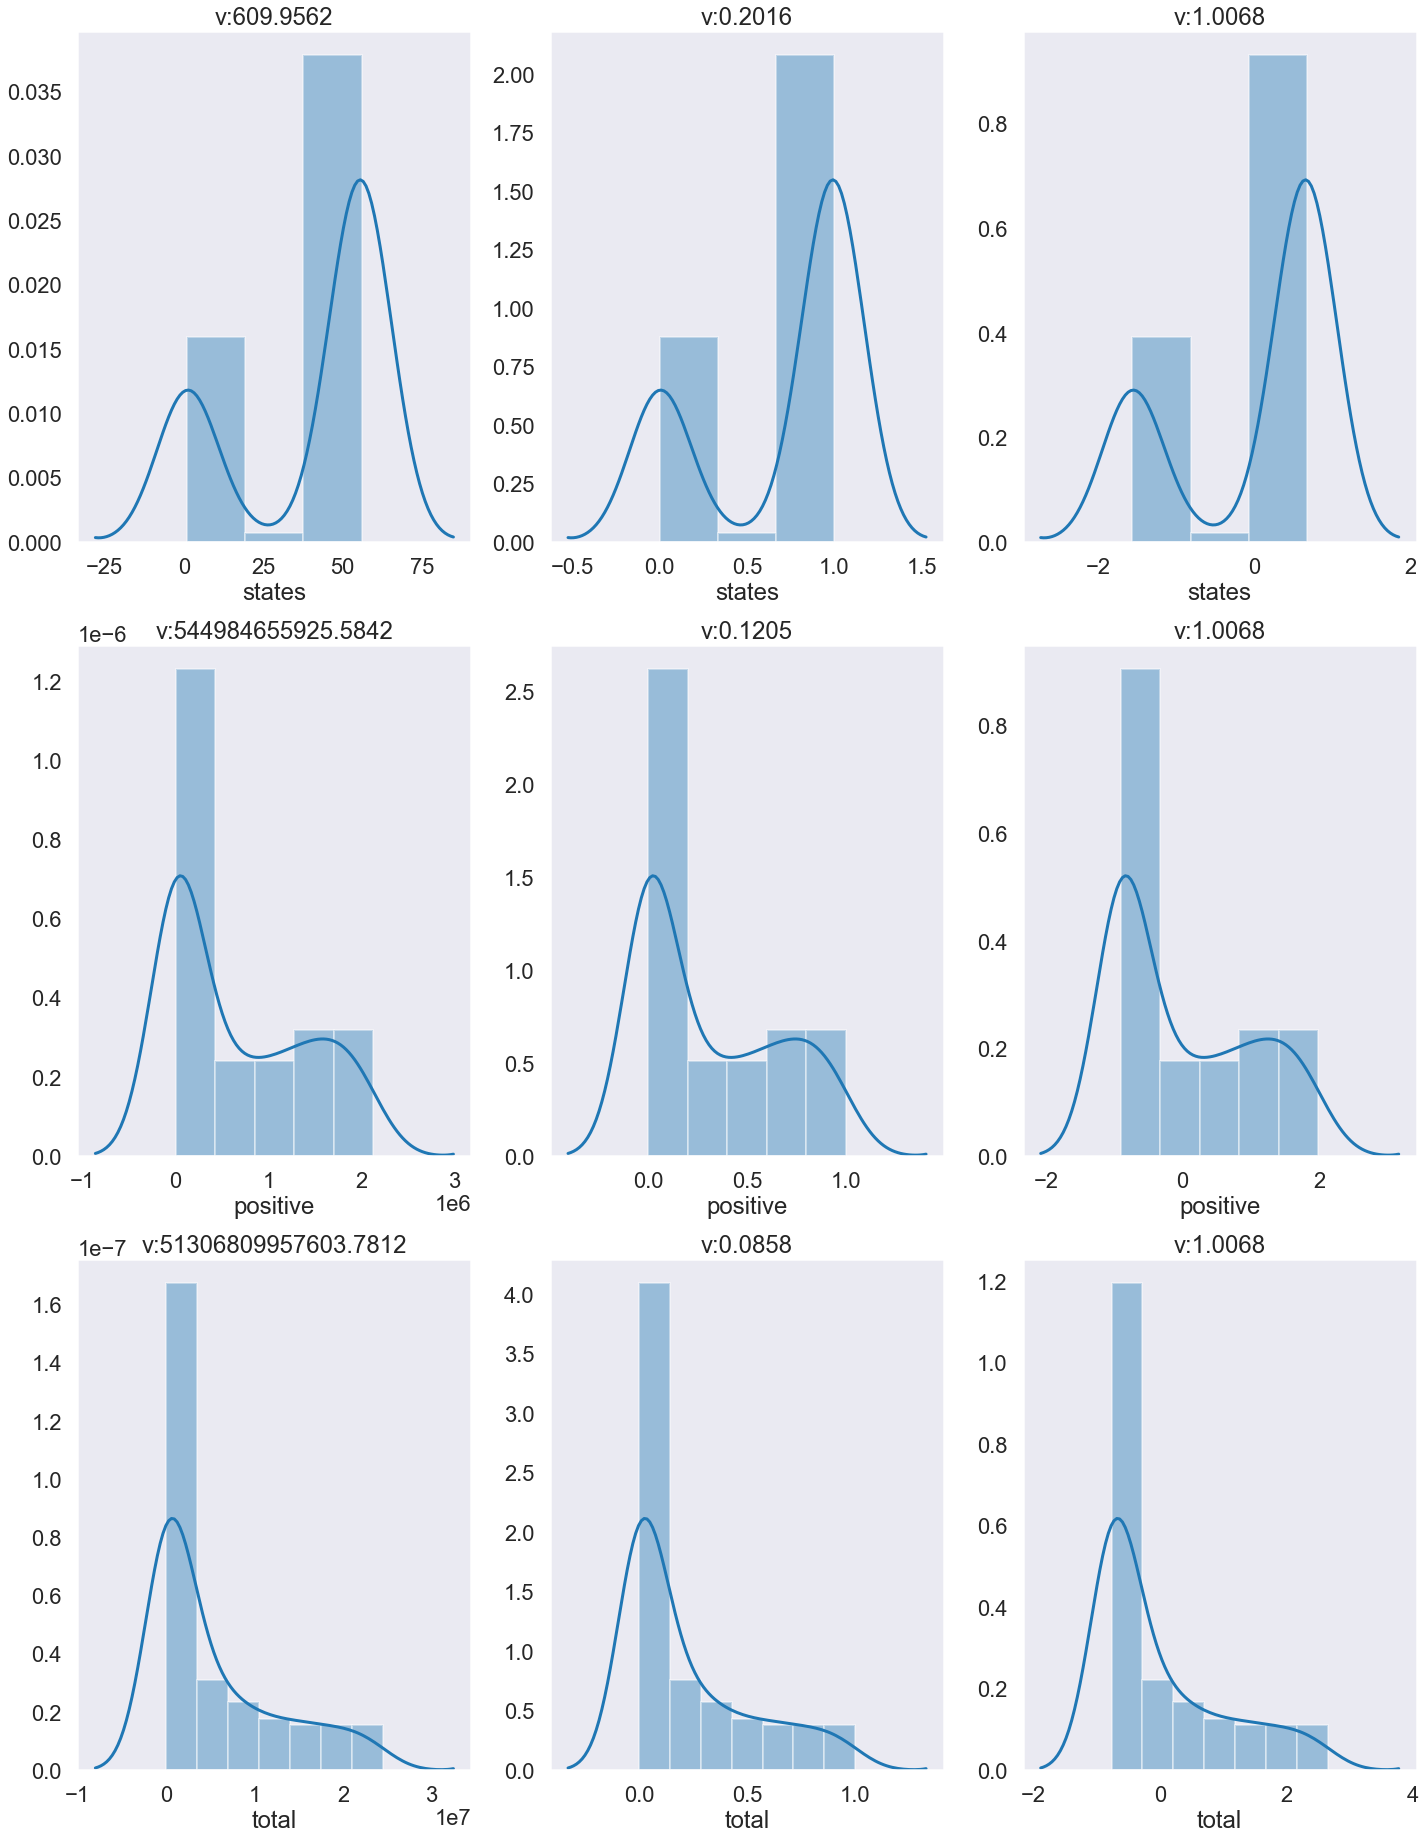

In [5]:
fig,axes=plt.subplots(3,3,figsize=(24,32)) 
sns.distplot(df0['states'], ax=axes[0, 0])
sns.distplot(df1['states'], ax=axes[0, 1])
sns.distplot(df2['states'], ax=axes[0, 2])
axes[0, 0].set_title('v:%.4f'% (df0['v_states'].mean()))
axes[0, 1].set_title('v:%.4f'% (df1['v_states'].mean()))
axes[0, 2].set_title('v:%.4f'% (df2['v_states'].mean()))

sns.distplot(df0['positive'], ax=axes[1, 0])
sns.distplot(df1['positive'], ax=axes[1, 1])
sns.distplot(df2['positive'], ax=axes[1, 2])
axes[1, 0].set_title('v:%.4f'% (df0['v_positive'].mean()))
axes[1, 1].set_title('v:%.4f'% (df1['v_positive'].mean()))
axes[1, 2].set_title('v:%.4f'% (df2['v_positive'].mean()))

sns.distplot(df0['total'], ax=axes[2, 0])
sns.distplot(df1['total'], ax=axes[2, 1])
sns.distplot(df2['total'], ax=axes[2, 2])
axes[2, 0].set_title('v:%.4f'% (df0['v_total'].mean()))
axes[2, 1].set_title('v:%.4f'% (df1['v_total'].mean()))
axes[2, 2].set_title('v:%.4f'% (df2['v_total'].mean()))

# 特征提取demo，关联系数